In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import re
from nltk.stem.porter import PorterStemmer as PS
# General libraries

from sklearn.preprocessing import LabelEncoder as labenc
from sklearn.model_selection import train_test_split as TTS
# Preprocessing libraries

In [3]:
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import plot_confusion_matrix as pltconf
# Classification

from sklearn.tree import DecisionTreeClassifier as dtree
from sklearn.naive_bayes import MultinomialNB as nb
from sklearn.ensemble import RandomForestClassifier as rfc
# Classification methods libraries

In [4]:
from wordcloud import WordCloud as WC
from sklearn.feature_extraction.text import TfidfVectorizer as vect

In [5]:
df = pd.read_csv("./datasets/movie_reviews/Train.csv", names = ['review','sentiment'])
df2 = pd.read_csv("./datasets/movie_reviews/Valid.csv", names = ['review', 'sentiment'])
df3 = pd.read_csv("./datasets/IMDB Dataset.csv", names = ['review', 'sentiment'])
df4 = pd.read_csv("./datasets/movie_reviews/Test.csv", names = ['review', 'sentiment'])

df = df.drop(0, axis = 'index')
df2 = df2.drop(0, axis = 'index')
df3 = df3.drop(0, axis = 'index')
df4 = df4.drop(0, axis = 'index')

df = df.append(df2)
df = df.append(df3)
df = df.append(df4)

print(df.shape)
df.head()

(100000, 2)


,review,sentiment
1,I grew up (b. 1965) watching and loving the Th...,0
2,"When I put this movie in my DVD player, and sa...",0
3,Why do people who do not know what a particula...,0
4,Even though I have great interest in Biblical ...,0
5,Im a die hard Dads Army fan and nothing will e...,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 1 to 5000
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   review     100000 non-null  object
 1   sentiment  100000 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [7]:
df['sentiment'].replace(to_replace = '0', value = 'negative', inplace = True)
df['sentiment'].replace(to_replace = '1', value = 'positive', inplace = True)
df.head()

,review,sentiment
1,I grew up (b. 1965) watching and loving the Th...,negative
2,"When I put this movie in my DVD player, and sa...",negative
3,Why do people who do not know what a particula...,negative
4,Even though I have great interest in Biblical ...,negative
5,Im a die hard Dads Army fan and nothing will e...,positive


In [8]:
def text_processor(dataframe):
    
    dataframe['review'] = dataframe['review'].apply(lambda x : ' '.join(x.lower() for x in x.split()))
    dataframe['review'] = dataframe['review'].str.replace('[^\w\s]', '')
    
    return dataframe

In [9]:
df = text_processor(df)

In [25]:
pos_df = df.where(df['sentiment'] == 'positive').dropna()
pos_rev = np.array(pos_df['review'])

neg_df = df.where(df['sentiment'] == 'negative').dropna()
neg_rev = np.array(neg_df['review'])

stopset = set(stopwords.words('english'))
stopset.add('br')
stopset.add('film')
stopset.add('movie')

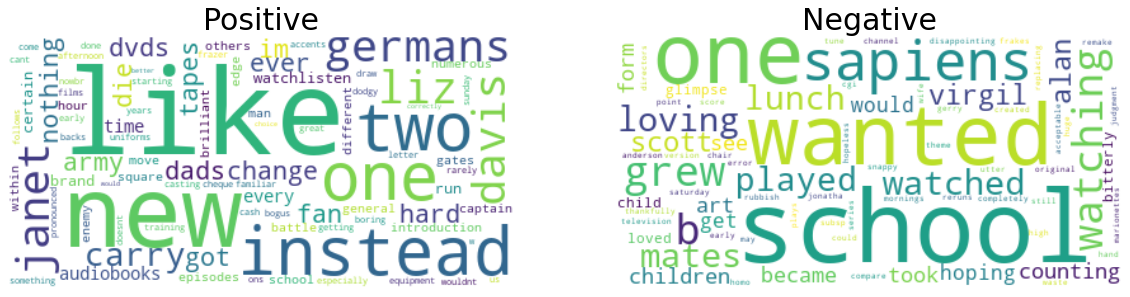

In [24]:
pos_rev_cloud = WC(background_color = 'white', stopwords = stopset).generate(pos_rev[0])
neg_rev_cloud = WC(background_color = 'white', stopwords = stopset).generate(neg_rev[0])

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,20))

ax[0].imshow(pos_rev_cloud, interpolation = 'bilinear')
ax[1].imshow(neg_rev_cloud, interpolation = 'bilinear')

ax[0].set_title('Positive', fontsize = 30)
ax[1].set_title('Negative', fontsize = 30)

ax[0].axis(False)
ax[1].axis(False)

plt.show()

In [26]:
vectorizer = vect(use_idf = True, lowercase = True, strip_accents = 'ascii', stop_words = stopset)

In [27]:
yvals = df.sentiment
xvals = vectorizer.fit_transform(df.review)

In [28]:
train_x, test_x, train_y, test_y = TTS(xvals, yvals, test_size = 0.2, random_state = 0)

Accuracy :  0.89955


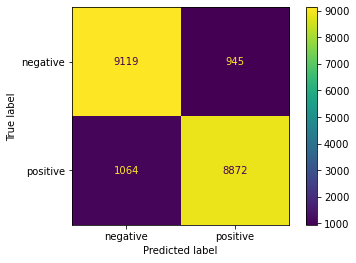

In [29]:
nb_model = nb(alpha = 1)
nb_model.fit(train_x, train_y)
print("Accuracy : ", acc(test_y, nb_model.predict(test_x)))

pltconf(nb_model, test_x, test_y)
plt.show()

Accuracy :  0.79785


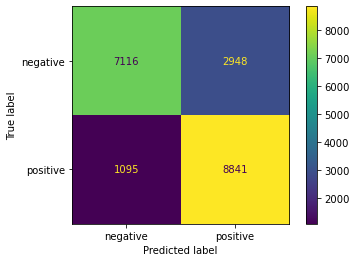

In [30]:
dtree_model = dtree(criterion = 'entropy', max_depth = 20)
dtree_model.fit(train_x, train_y)
print("Accuracy : ", acc(test_y, dtree_model.predict(test_x)))

pltconf(dtree_model, test_x, test_y)
plt.show()

Accuracy :  0.9722


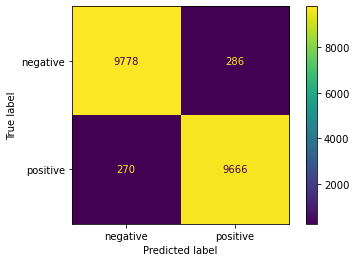

In [31]:
rfc_model = rfc()
rfc_model.fit(train_x, train_y)
print("Accuracy : ", acc(test_y, rfc_model.predict(test_x)))

pltconf(rfc_model, test_x, test_y)
plt.show()

In [32]:
user_review = str(input("Enter your review : "))
user_review = np.array([user_review])

x_trial_value = vectorizer.transform(user_review)
print()
print("Naive bayes : ", nb_model.predict(x_trial_value))
print('-' * 30)
print("Random Forest : ", rfc_model.predict(x_trial_value))
print('-' * 30)
print("Decision tree : ", dtree_model.predict(x_trial_value))

Enter your review :  the movie is great



Naive bayes :  ['positive']
------------------------------
Random Forest :  ['positive']
------------------------------
Decision tree :  ['positive']
